# Naive Bayes

In [1]:
import numpy as np

In [2]:
def my_gpdf(x,mean,std):
    exp=np.exp(-((x-mean)**2/(2*std*2)))
    return (1/(np.sqrt(2*np.pi)*std))*exp

In [3]:
child_age=[8,5,6,4,3]
child_h=[60,70,54,67,75]
adult_age=[27,30,32,24,23]
adult_h=[160,172,180,156,166]

mca=np.mean(child_age)
mch=np.mean(child_h)
sca=np.std(child_age)
sch=np.std(child_h)

maa=np.mean(adult_age)
mah=np.mean(adult_h)
saa=np.std(adult_age)
sah=np.std(adult_h)


In [4]:
test=[35,178]

In [5]:
result1= my_gpdf(test[0],mca,sca)*my_gpdf(test[1],mch,sch)*0.5
result1

2.5577284786842453e-245

# Naive Bayes Implementation

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# To Enable plotting graphs in Jupyter Notebook
%matplotlib inline
from sklearn.model_selection  import train_test_split
# To Enable plotting graphs in Jupyter Notebook
from scipy.stats import zscore
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier

In [33]:
col=["Preg","Glc","BP","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age","Outcome"]
data=pd.read_csv("pima-indians-diabetes-1.data",names=col)

In [34]:
data.head()

,Preg,Glc,BP,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [35]:
y=data["Outcome"]
x=data.drop(columns="Outcome")
x_std=StandardScaler().fit_transform(x)      
# scaling of Input, don't scale output(because it is categorical), we can also use Z score, this is another method


x_train,x_test,y_train,y_test= train_test_split(x_std,y,test_size=0.3,random_state=2)

In [36]:
rfmodel=RandomForestClassifier(n_estimators=50,criterion='entropy',random_state=0)
dtmodel=DecisionTreeClassifier(criterion='entropy',random_state=0)
model=GaussianNB()
lrmodel=LogisticRegression()


In [37]:
params={'max_depth':np.arange(1,10),'n_estimators':np.arange(1,25)}
rf=RandomForestClassifier(criterion='entropy',random_state=2)
gs=GridSearchCV(rf,params,cv=3)
gs.fit(x_std,y)
gs.best_params_

{'max_depth': 5, 'n_estimators': 22}

In [38]:
params={'max_depth':np.arange(1,10)}
DT=DecisionTreeClassifier(criterion='entropy',random_state=2)
gs=GridSearchCV(DT,params,cv=3)
gs.fit(x_std,y)
gs.best_params_

{'max_depth': 4}

In [39]:
rfmodel=RandomForestClassifier(n_estimators=22,criterion='entropy',random_state=0,max_depth=5)

dtmodel=DecisionTreeClassifier(criterion='entropy',random_state=0,max_depth=4)

model.fit(x_train,y_train)
dtmodel.fit(x_train,y_train)
lrmodel.fit(x_train,y_train)
rfmodel.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=22, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [40]:
models=[]
models.append(('Decision Tree',dtmodel))
models.append(('Random Forest',rfmodel))
models.append(('Naives Bayes',model))
models.append(('Logistic Regression',lrmodel))

Decision Tree: 0.735736 ,(variance error is 0.054485)
Random Forest: 0.765665 ,(variance error is 0.031864)
Naives Bayes: 0.752661 ,(variance error is 0.028958)
Logistic Regression: 0.770911 ,(variance error is 0.035045)


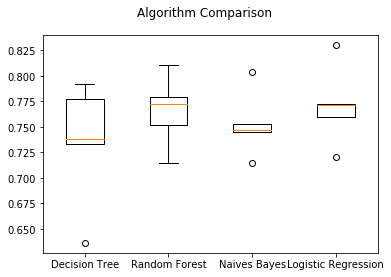

In [41]:
results=[]
names=[]
scoring='accuracy'
for name, model in models:
    kfold=model_selection.KFold(n_splits=5,random_state=2)
    cv_results=model_selection.cross_val_score(model,x_std,y,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg="%s: %f ,(variance error is %f)"%(name,cv_results.mean(),cv_results.std())
    print(msg)

fig=plt.figure()
fig.suptitle("Algorithm Comparison")
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()